<a href="https://colab.research.google.com/github/Keving7898/MODELO-LLM-EXAMEN-FINAL/blob/main/Abrir_modelo_manzanas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow.keras import  Sequential, layers

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
path_json="/content/drive/MyDrive/clasificador_manzanas.json"
path_h5="/content/drive/MyDrive/clasificador_manzanas.h5"

json_file=open(path_json,"r")
modelo_json=json_file.read()
json_file.close()

modelo=tf.keras.models.model_from_json(modelo_json)

modelo.load_weights(path_h5)
print("Se cargo el modelo!!!!")


Se cargo el modelo!!!!


In [30]:
# probar nuestro modelo con imágenes sacas de internet (Enlace)
from PIL import Image
import requests
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

def imagen_mostrar(url):
  if url != '':
    !mkdir url_manzana
    #Descargar imagen desde URL para presentarlo en google colab
    name = 'muestra.jpg'
    size=(250,250)

    # Se descarga, a partir de la url
    img_manzana=Image.open(requests.get(url,stream=True).raw)
    # Redefinir tamaño
    img_manzana=img_manzana.resize(size)
    # Guarda en carpeta
    images='url_manzana'
    img_manzana.save(images+'/'+name)

    path_apple='/content/url_manzana/muestra.jpg'

    img=cv2.imread(path_apple)
    res=cv2.resize(img,size)
    cv2_imshow(res)
  else:
      print('url vacia')
  return 'listo'

# elaborar una función
def modelo_prediccion(url):
  descarga=requests.get(url)
  manzana=Image.open(BytesIO(descarga.content))
  manzana=np.array(manzana).astype(float)/255

  manzana=cv2.resize(manzana,(250,250))
  prediccion=modelo.predict(manzana.reshape(-1,250,250,3))

  if prediccion[0]>0.5:
     respuesta='Manzana Podrida'
  else:
     respuesta='Manzana Fresca'
  return respuesta

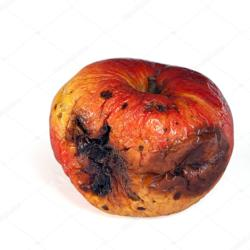

1/1 [==============================] - 0s 40ms/step
Manzana Podrida


In [33]:
url='https://static3.depositphotos.com/1001025/239/i/950/depositphotos_2395678-stock-photo-rotten-apple.jpg'
imagen_mostrar(url)
resultado=modelo_prediccion(url)
print(resultado)
